Prediction(s): [1 1 1] 
Accuracy score sklearn: 0.3333333333333333 | Our score: 0.3333333333333333


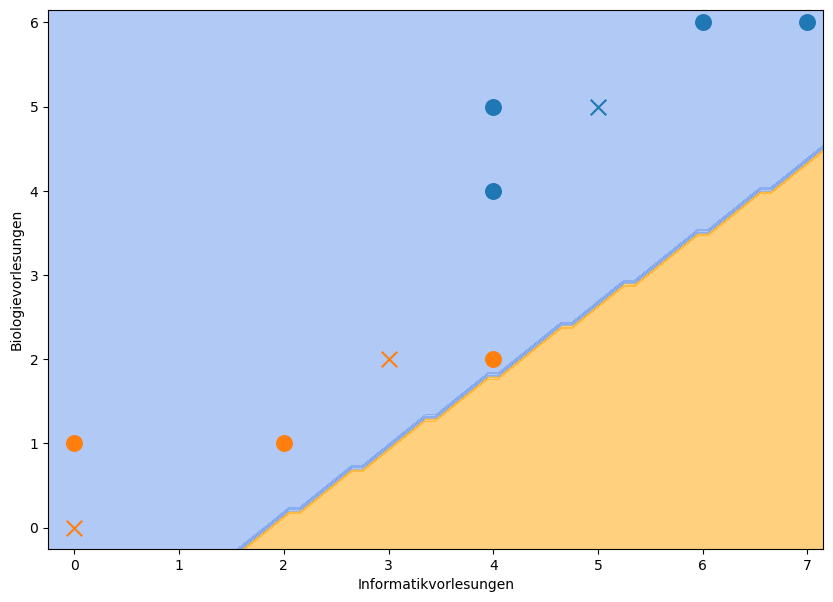

In [7]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


class NaiveBayesClassifier():

    def __init__(self):
        self.X = None
        self.Y = None
        self.classes = []
        self.priors = []

    def fit(self, X, Y): #calculate prior probabilities and save train data + labels
        self.classes = np.unique(Y) # Y = {0, 1, 0, 1, 1, 1, 0, 0, 1, 0} classes = {0, 1}
        for i in self.classes:
            self.priors.append(np.log(len(Y[Y==i])/len(Y))) # prior[0] = 5/10  prior[1] = 5/10 # Using log to prevent overflows: youtube.com/watch?v=8nogLkirA3I
        self.X = X
        self.Y = Y

    def calculate_categorical_likelihood(self, curr_class, feature_idx, feature_val): # Used for non-continuous variables e.g. Y = {0, 1, 2, ..., n} Continuous: Y in {1, 20} (Between 1 and 20) 
        Y_curr_idx = self.Y == curr_class # All indices where Y = curr_class
        X_curr = self.X[Y_curr_idx] # All data points where Y = curr_class
        likelihood = (1+len(X_curr[ X_curr[:,feature_idx] == feature_val ] )) / len(X_curr) # P(X|Y) = P(X = feature_value | Y = curr_class)
        #print(f"Likelihood for P(X{feature_idx}={feature_val}|Y={curr_class}) = {likelihood}")
        return likelihood

    def predict(self, X):
        Y_pred =  []
        for x in X: # x = [[5, 6], [1, 2], ...]
            #print(x)
            likelihoods = []
            for curr_class in self.classes: # classes = {0, 1}
                curr_likelihood = 1
                for feature_idx, feature_val in enumerate(x): # it1 = (idx:0;val=5) it2 = (idx:1;val=6 )
                    curr_likelihood *= self.calculate_categorical_likelihood(curr_class, feature_idx, feature_val) # P(X1 | Y) * P(X2 | Y) * ... P(Xn | Y)
                likelihoods.append(curr_likelihood)
               # print(f"Class {curr_class} done")

           # print("Classes done. Starting calculating posteriors. Posterior = Likelihood * Prior")
            posteriors = []
            for idx in range(len(self.classes)):
                posterior = likelihoods[idx] + self.priors[idx] # Important: Using + instead of * because of np.log() in 'calculate_categorical_likelihood'
                posteriors.append(posterior)
               # print(f"{likelihoods[idx]} * {self.priors[idx]} = {posterior}")

            y_pred = self.classes[np.argmax(posteriors)]
            #print(f"{x} is classified to {y_pred}")
            Y_pred.append(y_pred)

        return np.array(Y_pred)


# Plotgröße festlegen
mpl.rcParams['figure.figsize'] = (10, 7)

informatik = np.array([0, 0, 2, 3, 4, 4, 4, 5, 6, 7])
bio = np.array([0, 1, 1, 2, 2, 4, 5, 5, 6, 6])
X = np.c_[informatik, bio]

y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

X_train_0 = X_train[y_train == 0]
X_train_1 = X_train[y_train == 1]
X_test_0 = X_test[y_test == 0]
X_test_1 = X_test[y_test == 1]

# Du hast 5 BioV und 6 InfoV gehört. Wie hoch ist die Wahrscheinlichkeit, dass du Interesse hast
# P(Y = 1 | X = {5, 6}) = ?

classifier = NaiveBayesClassifier()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(f"Prediction(s): {predictions} ")

sklearn_classifier = MultinomialNB()
sklearn_classifier.fit(X_train, y_train)

accSore = accuracy_score(y_test, classifier.predict(X_test))
sklearn_accSore = accuracy_score(y_test, sklearn_classifier.predict(X_test))

print(f"Accuracy score sklearn: {sklearn_accSore} | Our score: {accSore}")

res = 0.1
x_max, y_max = np.max(X, axis=0) + 0.25
x_min, y_min = np.min(X, axis=0) - 0.25

cmap_light = ListedColormap(['orange', 'cornflowerblue'])

grid_x, grid_y = np.meshgrid(np.arange(x_min, x_max, res), np.arange(y_min, y_max, res))
grid_input = np.c_[grid_x.reshape(-1), grid_y.reshape(-1)]

grid_out = sklearn_classifier.predict(grid_input).reshape(grid_x.shape)

plt.contourf(grid_x, grid_y, grid_out, alpha=0.5, cmap=cmap_light)

plt.scatter(X_train_0[:, 0], X_train_0[:,1], label="Kein Interesse", s=125, c="#ff7f0e")
plt.scatter(X_train_1[:, 0], X_train_1[:,1], label="Interesse", s=125, c="#1f77b4")
plt.scatter(X_test_0[:, 0], X_test_0[:,1], label="Kein Interesse - Test", marker="x", s=125, c="#ff7f0e")
plt.scatter(X_test_1[:, 0], X_test_1[:,1], label="Interesse", marker="x",s=125, c="#1f77b4")

plt.xlabel("Informatikvorlesungen")
plt.ylabel("Biologievorlesungen")

plt.show()
